<a href="https://colab.research.google.com/github/priyanshu3042/CreditCard_FraudDetection/blob/main/Untitled28.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Saving creditcard.csv to creditcard.csv


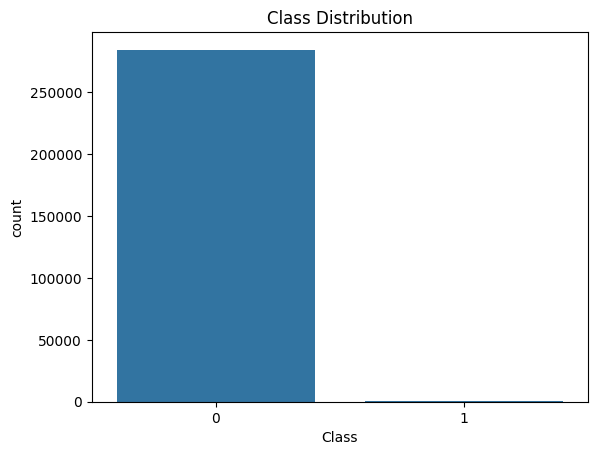

Class
0    284315
1       492
Name: count, dtype: int64
Confusion Matrix:
 [[56843    21]
 [   14    84]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.80      0.86      0.83        98

    accuracy                           1.00     56962
   macro avg       0.90      0.93      0.91     56962
weighted avg       1.00      1.00      1.00     56962


ROC-AUC Score: 0.9283867774740735


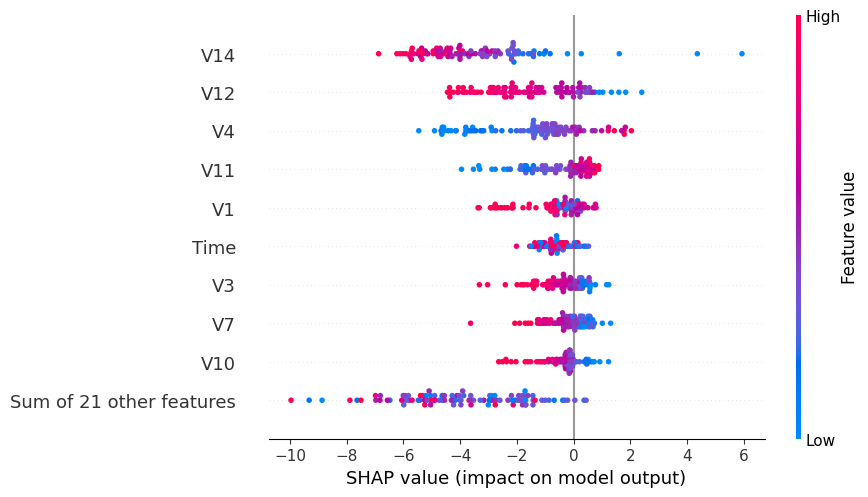

In [1]:
# Install dependencies
!pip install -q seaborn scikit-learn imbalanced-learn xgboost shap

# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from imblearn.over_sampling import SMOTE
import xgboost as xgb
import shap
from google.colab import files

# Upload and load dataset
uploaded = files.upload()
df = pd.read_csv('creditcard.csv')

# Class distribution
sns.countplot(data=df, x='Class')
plt.title('Class Distribution')
plt.show()
print(df['Class'].value_counts())

# Feature/target split
X = df.drop(['Class'], axis=1)
y = df['Class']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Handle imbalance with SMOTE
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X_train, y_train)

# Train XGBoost (warning-free version)
model = xgb.XGBClassifier(eval_metric='logloss')
model.fit(X_res, y_res)

# Predictions and evaluation
y_pred = model.predict(X_test)
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nROC-AUC Score:", roc_auc_score(y_test, y_pred))

# SHAP Explainability
explainer = shap.Explainer(model)
shap_values = explainer(X_test[:100])
shap.plots.beeswarm(shap_values)
